In [1]:
import seaborn
import pandas as pd
import re
import time
from functools import wraps
from pathlib import Path
from shapely import Point, Polygon

In [2]:
def read_contour_file(file_path: str | Path) -> pd.DataFrame:
    line_split_comp = re.compile(r"\s*,")

    with open(file_path, "r") as f:
        raw_file = f.readlines()

    l_raw_lines = [line_split_comp.split(raw_file_line.strip()) for raw_file_line in raw_file]
    l_raw_lines = list(filter(lambda item: bool(item[0]), l_raw_lines))
    float_raw_lines = [list(map(float, raw_line))[:2] for raw_line in l_raw_lines]
    header_line = float_raw_lines.pop(0)
    assert len(float_raw_lines) == int(header_line[0])
    return pd.DataFrame(float_raw_lines, columns=["lat", "long"])

In [3]:
def read_data_file(file_path: str | Path) -> pd.DataFrame:
    with open(file_path, "r") as f:
        raw_file = f.readlines()

    list_dados = [line.split() for line in raw_file]
    float_raw_lines = [list(map(float, raw_line)) for raw_line in list_dados]
    return pd.DataFrame(float_raw_lines, columns=["lat", "long", "data_value"])

In [4]:
data_df: pd.DataFrame = read_data_file("forecast_files/ETA40_p011221a021221.dat")
data_df

,lat,long,data_value
0,-75.0,-35.0,0.0
1,-75.0,-34.6,0.1
2,-75.0,-34.2,0.0
3,-75.0,-33.8,0.0
4,-75.0,-33.4,0.0
...,...,...,...
11408,-30.2,3.4,4.5
11409,-30.2,3.8,8.0
11410,-30.2,4.2,13.3
11411,-30.2,4.6,24.6


In [5]:
contour_df: pd.DataFrame = read_contour_file("PSATCMG_CAMARGOS.bln")
contour_df

,lat,long
0,-44.601813,-22.272547
1,-44.599567,-22.271080
2,-44.592339,-22.270568
3,-44.592349,-22.267206
4,-44.591326,-22.263839
...,...,...
1053,-44.617282,-22.288938
1054,-44.613593,-22.287491
1055,-44.608377,-22.282603
1056,-44.605313,-22.278010


In [6]:
print(list(contour_df.itertuples(index=False, name=None)))
print(contour_df.iloc[1:])
print(contour_df.iloc[:1])
print(contour_df.iloc[1:] + contour_df.iloc[:1])

[(-44.60181259796872, -22.27254676426213), (-44.59956701592149, -22.27108034847117), (-44.59233941813173, -22.27056786161309), (-44.59234928032314, -22.26720552668664), (-44.59132648222495, -22.26383856353058), (-44.5872001217095, -22.26237913554958), (-44.58102304664999, -22.25610700587967), (-44.57689556243578, -22.25512785986716), (-44.57690726234982, -22.25128503028315), (-44.57382576883479, -22.2459872269107), (-44.56971646172228, -22.23924356331573), (-44.56714726779549, -22.23538904321388), (-44.56456915219232, -22.23441671996859), (-44.56043331160613, -22.2363197173898), (-44.55630656201527, -22.2353404361525), (-44.55424937364533, -22.23292926692841), (-44.55322312347383, -22.23100309623478), (-44.54961278681279, -22.23002609371716), (-44.54392507977332, -22.23288288713534), (-44.53567207742916, -22.23092419385188), (-44.52587234331977, -22.22847807203051), (-44.52020246779004, -22.22605050411649), (-44.51453111240512, -22.22410329386091), (-44.50856142845939, -22.222053561044

In [7]:
ls = list(contour_df.itertuples(index=False, name=None))

print(ls[1:])
print(ls[:1])
print(ls[1:] + ls[1:])

[(-44.59956701592149, -22.27108034847117), (-44.59233941813173, -22.27056786161309), (-44.59234928032314, -22.26720552668664), (-44.59132648222495, -22.26383856353058), (-44.5872001217095, -22.26237913554958), (-44.58102304664999, -22.25610700587967), (-44.57689556243578, -22.25512785986716), (-44.57690726234982, -22.25128503028315), (-44.57382576883479, -22.2459872269107), (-44.56971646172228, -22.23924356331573), (-44.56714726779549, -22.23538904321388), (-44.56456915219232, -22.23441671996859), (-44.56043331160613, -22.2363197173898), (-44.55630656201527, -22.2353404361525), (-44.55424937364533, -22.23292926692841), (-44.55322312347383, -22.23100309623478), (-44.54961278681279, -22.23002609371716), (-44.54392507977332, -22.23288288713534), (-44.53567207742916, -22.23092419385188), (-44.52587234331977, -22.22847807203051), (-44.52020246779004, -22.22605050411649), (-44.51453111240512, -22.22410329386091), (-44.50856142845939, -22.22205356104431), (-44.50319230881271, -22.219247963023

In [8]:
import geopandas as gpd
tuple_contour = contour_df.itertuples(index=False, name=None)
points_contour = [Point(tup) for tup in tuple_contour]
contour_gs = gpd.GeoSeries(points_contour, crs="EPSG:4326")
contour_gs


0       POINT (-44.60181 -22.27255)
1       POINT (-44.59957 -22.27108)
2       POINT (-44.59234 -22.27057)
3       POINT (-44.59235 -22.26721)
4       POINT (-44.59133 -22.26384)
                   ...             
1053    POINT (-44.61728 -22.28894)
1054    POINT (-44.61359 -22.28749)
1055    POINT (-44.60838 -22.28260)
1056    POINT (-44.60531 -22.27801)
1057    POINT (-44.60181 -22.27255)
Length: 1058, dtype: geometry

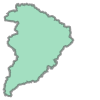

In [9]:
contour_gs.contains(Point(-44.600, -22.271))

Polygon(contour_df.values)

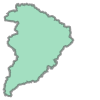

In [10]:
poly = Polygon(points_contour)
poly

In [11]:
cnt = 0.0
for lat, long, val in data_df.itertuples(index=False, name=None):
    if poly.contains(Point(lat, long)):
        cnt += val

cnt

10.8

In [12]:
def is_inside_contour(edges, lat: float, long: float) -> bool:
    # Checking if the point is inside the contour by casting a ray at one side from the
    # `(lat, long)` point and counting if number of times the line crosses the polygon.
    # If it's odd, the point is inside, otherwise it is outside.
    #
    # The case is always true independent of the ray direction. So for simplicity, we
    # are always casting a ray to the left of the point.
    cnt = 0
    for edge in edges:
        (lat1, long1), (lat2, long2) = edge
        # The point must be between the values of the longitude of the edge (Point pair)
        cond1 = (long < long1) != (long < long2)
        # The point must be:
        # - The latitude value must be lower than both latitude values of the edge to be inside  # noqa: E501
        # - The latitude value must bigger than both latitude values of the edge to be outside  # noqa: E501
        # - If it is between the both latitude values of the edge:
        #   Consider lat_zero the latitude value of the exact point where the ray crosses the edge line  # noqa: E501
        #   - It is inside if the lat is before lat_zero
        #   - It is outside if the lat is before lat_zero
        #
        # The calculation of the lat_zero and check the validity can be simplified by
        # the equation used below
        cond2 = lat < lat1 + ((long - long1) / (long2 - long1 + 0.00000001)) * (lat2 - lat1)

        if cond1 and cond2:
            cnt += 1

    return cnt % 2 == 1

def apply_contour(contour_df: pd.DataFrame, data_df: pd.DataFrame) -> pd.DataFrame:
    contour_list = list(contour_df.itertuples(index=False, name=None))
    list_edges = list(zip(contour_list, contour_list[1:] + contour_list[:1]))
    
    inside_contour = []
    for (lat, long, val) in data_df.itertuples(index=False, name=None):
        if is_inside_contour(edges=list_edges, lat=lat, long=long):
            inside_contour.append([lat, long, val])
    
    return pd.DataFrame(inside_contour, columns=["lat", "long", "data_value"])

apply_contour(contour_df, data_df).loc[:,"data_value"]

0    1.0
1    1.7
2    0.4
3    2.9
4    4.8
Name: data_value, dtype: float64

In [13]:
def apply_contour(contour_df: pd.DataFrame, data_df: pd.DataFrame) -> pd.DataFrame:
    contour = Polygon(contour_df.values)

    inside_contour = [] # pd.DataFrame(columns=["lat", "long", "data_value"])
    for lat, long, val in data_df.itertuples(index=False, name=None):
        if contour.contains(Point(lat, long)):
            inside_contour.append([lat, long, val])
            # inside_contour = inside_contour.append(pd.DataFrame([[lat, long, val]], columns=["lat", "long", "data_value"]), ignore)

    return pd.DataFrame(inside_contour, columns=["lat", "long", "data_value"])

apply_contour(contour_df, data_df).loc[:,"data_value"]

0    1.0
1    1.7
2    0.4
3    2.9
4    4.8
Name: data_value, dtype: float64

In [14]:
"ETA40_p011221a021221"[14:16]

'02'

In [15]:
from typing import Optional
from pandas import Timestamp

def get_dates_from_eta_filename(filename: str) -> Optional[tuple[Timestamp, Timestamp]]:
    if filename.startswith("ETA40_p"):
        forecast_day = int(filename[7:9])
        forecast_mon = int(filename[9:11])
        forecast_yr = 2000 + int(filename[11:13])

        forecasted_day = int(filename[14:16])
        forecasted_mon = int(filename[16:18])
        forecasted_yr = 2000 + int(filename[18:20])

        forecast_date = Timestamp(year=forecast_yr, month=forecast_mon, day=forecast_day)
        forecasted_date = Timestamp(year=forecasted_yr, month=forecasted_mon, day=forecasted_day)

        return (forecast_date, forecasted_date)

    return None

In [16]:
contour_df: pd.DataFrame = read_contour_file("PSATCMG_CAMARGOS.bln")
files = Path("forecast_files").glob("*.dat")
acumuladas = []

for filepath in files:
    timestamps = get_dates_from_eta_filename(filepath.name)
    # ignore wrong files
    if timestamps is None:
        continue

    forecast_date, forecasted_date = timestamps

    data_df = read_data_file(filepath)
    processed_df = apply_contour(contour_df, data_df)
    acumulada = processed_df["data_value"].sum()

    acumuladas.append([forecast_date, forecasted_date, acumulada])

acumuladas_df = pd.DataFrame(
    acumuladas,
    columns=[
        "forecast_date",
        "forecasted_date",
        "accumulated preciptation",
    ],
)
acumuladas_df

,forecast_date,forecasted_date,accumulated preciptation
0,2021-12-01,2021-12-11,5.6
1,2021-12-01,2021-12-08,95.2
2,2021-12-01,2021-12-09,95.3
3,2021-12-01,2021-12-10,218.4
4,2021-12-01,2021-12-02,10.8
5,2021-12-01,2021-12-03,45.2
6,2021-12-01,2021-12-06,80.4
7,2021-12-01,2021-12-07,11.9
8,2021-12-01,2021-12-05,38.2
9,2021-12-01,2021-12-04,7.2


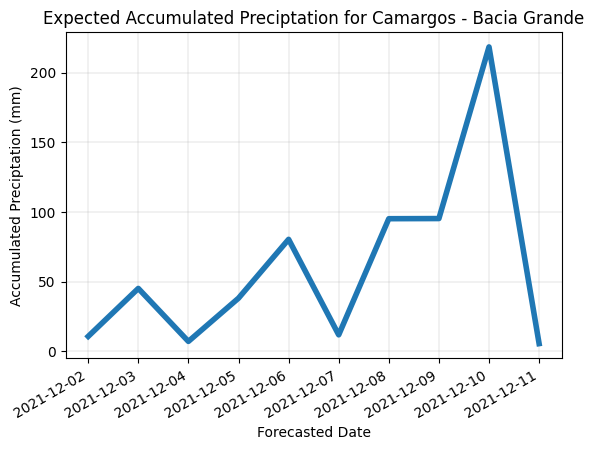

In [26]:
ax = acumuladas_df.loc[:, ["forecasted_date", "accumulated preciptation"]].plot.line(y="accumulated preciptation", x="forecasted_date", xlabel="Forecasted Date", ylabel="Accumulated Preciptation (mm)", title= "Expected Accumulated Preciptation for Camargos - Bacia Grande", legend=False, linewidth=4)
ax.grid(True, linewidth=0.25)